In [1]:
%load_ext autoreload
%autoreload 2

# Load Packages

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy_fracadf import fracadf2
from numpy_fracdiff import fracdiff

# Load Data

In [3]:
with np.load('data/demo1.npz') as data:
    X = data['px']

X = X[1:]  # chop 01-Jan
X.shape

(782, 4)

# Find best fractal order

In [4]:
tau=1e-4
mmax=527

%time d = fracadf2(X, tau=tau, mmax=mmax)

print(d)

CPU times: user 1.94 s, sys: 52.4 ms, total: 1.99 s
Wall time: 2.2 s
[0.2432444  0.42298966 0.32282179 0.20236383]


# Display results

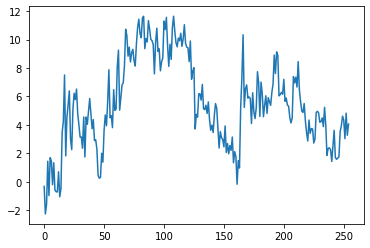

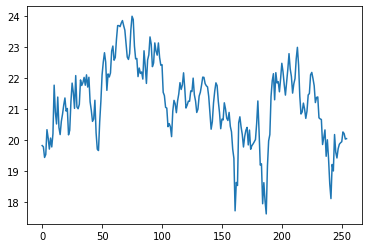

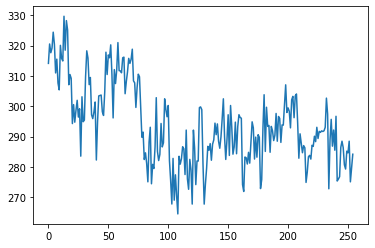

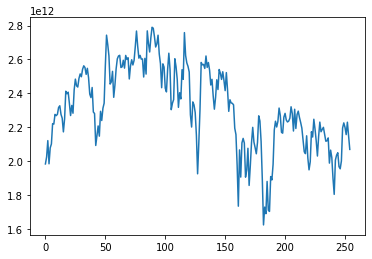

In [5]:
for j in range(X.shape[1]):
    z = fracdiff(X[:, j], order=d[j], tau=tau, mmax=mmax)
    plt.plot(z[mmax:]);
    plt.show();

# Find mmax given d and tau
`fracadf2` is using `mmax` to chop leading observations. 
This ensures that the ADF-test uses the same number of observations for all fractal orders `d`.

Fractal order around $\approx 0.3$ requires the highest truncation order for a given threshold $\tau$.

11.0


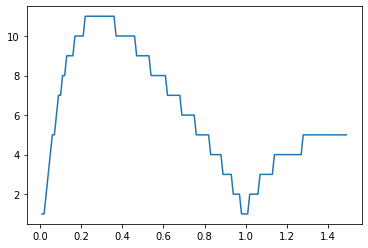

In [6]:
from numpy_fracdiff.find_truncation import find_truncation

tmp = []
for d in np.arange(0.01, 1.5, 0.01):
    tmp.append((d, find_truncation(d, tau=1e-2)[0]))
tmp = np.array(tmp)

plt.plot(tmp[:, 0], tmp[:, 1]);
print(tmp[:, 1].max())

In [7]:
print("{:^5s} | {:^6s}".format("tau", "*mmax"))
for tau in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    tmp = []
    for d in np.arange(0.01, 1.5, 0.01):
        tmp.append(find_truncation(d, tau=tau, mmax=1e7)[0])
    print("{:.0E} | {:6d}".format(tau, max(tmp)))

 tau  | *mmax 
1E-02 |     11
1E-03 |     73
1E-04 |    527
1E-05 |   4092
1E-06 |  33243
1E-07 | 278644
